###KOSIS 국가통계포털
- [국가_대륙_별\_상품군별_온라인쇼핑_해외직접판매액_2014-2021](https://kosis.kr/statisticsList/statisticsListIndex.do?vwcd=MT_ZTITLE&menuId=M_01_01#content-group)를 사용


###1. 어떤 상품군이 성장하고 있을까?
- 화장품 > 의류 및 패션 관련상품 > 음반·비디오·악기

###2. 어느 국가에 가장 많이 판매를 하고 있을까?
- 중국

####코로나의 영향으로 2020년도부터 온라인 판매의 감소된 것으로 예상함

###라이브러리 가져오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

###그래프 및 한글 폰트 기본설정

In [2]:
#맷플롯립 폰트 관련 매니저
import matplotlib.font_manager as fm

####시각화를 위한 폰트 설정

In [3]:
from IPython.display import set_matplotlib_formats
#그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 'ggplot' 스타일을 사용
plt.style.use('ggplot')
#폰트가 선명하게 보이기 위해
set_matplotlib_formats('svg')

In [4]:
#그래프에서 마이너스 폰트 깨지는 문제 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

####시스템에 설치된 폰트 확인

In [5]:
print("fm.findSystemFonts() : ", len(fm.findSystemFonts()))
nanum_font = [f for f in fm.findSystemFonts() if "Nanum" in f]
print("nanum_font : ", len(nanum_font))

fm.findSystemFonts() :  48
nanum_font :  31


####폰트 인스톨

In [6]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
fm._rebuild()
nanum_font = [f for f in fm.findSystemFonts() if "Nanum" in f]
print("nanum_font : ", len(nanum_font))

nanum_font :  31


####폰트 지정 및 확인

In [7]:
print("현재 설정 폰트 : ", plt.rcParams['font.family'])

#한글 폰트 경로(나눔바른고딕)
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath).get_name()
#맷플롯립 라이브리에 폰트 설정
plt.rc('font',family=font_name)
print("현재 설정 폰트 : ", plt.rcParams['font.family'])

현재 설정 폰트 :  ['sans-serif']
현재 설정 폰트 :  ['NanumBarunGothic']


###데이터 로드하기

In [8]:
df_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/Data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_2014-2021.csv', encoding='cp949')
df_raw.head(3)

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,2015 4/4,2016 1/4,2016 2/4,2016 3/4,2016 4/4,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4,2021 1/4 p)
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,450568,511395,494391,560853,726741,768504,574551,749612,858240,833672,897205,921586,974060,1251122,1345723,1526135,1881628,1529955,1284863,1650010,1517553,1178153
1,합계,합계,면세점,-,-,-,-,-,-,-,-,-,-,-,-,610257,441096,610630,677884,665613,725319,761836,770656,1070693,1157158,1336372,1655635,1297490,1051987,1410967,1247495,972384
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,158247,133455,138982,180356,168059,171886,159750,203404,180429,188565,189763,225993,232465,232876,239043,270058,205769


In [9]:
#columns  확인
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4', '2020 1/4', '2020 2/4', '2020 3/4',
       '2020 4/4', '2021 1/4 p)'],
      dtype='object')

In [10]:
#국가(대륙)별 데이터 빈도수 세기
df_raw['국가(대륙)별'].value_counts()

유럽연합(EU)      45
대양주           45
중남미           45
일본            45
중국            45
중동            45
미국            45
합계            45
아세안(ASEAN)    45
기타            45
Name: 국가(대륙)별, dtype: int64

In [11]:
#상품군별 데이터 빈도수 세기
df_raw['상품군별'].value_counts()

컴퓨터 및 주변기기      30
아동·유아용품         30
농축수산물           30
의류 및 패션 관련상품    30
스포츠·레저용품        30
서 적             30
음·식료품           30
가전·전자·통신기기      30
사무·문구           30
기 타             30
음반·비디오·악기       30
생활용품 및 자동차용품    30
화장품             30
합계              30
소프트웨어           30
Name: 상품군별, dtype: int64

In [12]:
#판매유형별 데이터 빈도수 세기
df_raw['판매유형별'].value_counts()

면세점 이외    150
면세점       150
계         150
Name: 판매유형별, dtype: int64

###분석과 시각화를 위한 tidy data 만들기

In [13]:
df = df_raw.melt(id_vars=['국가(대륙)별','상품군별','판매유형별'],var_name='기간',value_name='판매액')
df.sample(3)

,국가(대륙)별,상품군별,판매유형별,기간,판매액
11320,미국,스포츠·레저용품,면세점,2020 2/4,0
4267,아세안(ASEAN),농축수산물,면세점,2016 2/4,-
7063,중동,기 타,면세점,2017 4/4,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13050 entries, 0 to 13049
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  13050 non-null  object
 1   상품군별     13050 non-null  object
 2   판매유형별    13050 non-null  object
 3   기간       13050 non-null  object
 4   판매액      13050 non-null  object
dtypes: object(5)
memory usage: 509.9+ KB


###데이터 전처리
- 위에서 '-' 를 Nan으로 바꾸어주었음

####기간에서 연도, 분기를 분리하기

In [15]:
df['연도'] = df['기간'].map(lambda x: int(x.split()[0]))
df['분기'] = df['기간'].map(lambda x : int(x.split()[1].split('/')[0]))

####금액을 수치데이터로 표현하기 위해 데이터 타입 변

In [16]:
# - 문자를 결측치로 변경하고 float 타입으로 변경
df['판매액'] = df['판매액'].replace('-',np.nan).astype(float)

####필요없는 데이터 제거

In [17]:
#합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거
df = df[(df['국가(대륙)별'] != '합계') & (df['상품군별'] != '합계')].copy()

In [18]:
#결측치 보기
df[df['판매액'].isnull()]

,국가(대륙)별,상품군별,판매유형별,기간,판매액,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
53,미국,가전·전자·통신기기,면세점 이외,2014 1/4,NaN,2014,1
55,미국,소프트웨어,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
5393,기타,농축수산물,면세점 이외,2016 4/4,NaN,2016,4
5395,기타,생활용품 및 자동차용품,면세점,2016 4/4,NaN,2016,4
5396,기타,생활용품 및 자동차용품,면세점 이외,2016 4/4,NaN,2016,4
5398,기타,기 타,면세점,2016 4/4,NaN,2016,4


###시각화

In [19]:
#판매유형별에는 계, 면세점, 면세점이외 의 값이 들어가야 한다.
#그러나 2014 - 2016 년 데이터에 계만 존재하는 것이 있음.
#계 는 면세점, 면세점 이외의 자료를 합한 것
df_total = df[df['판매유형별'] =='계'].copy()
df_total.head(3)

,국가(대륙)별,상품군별,판매유형별,기간,판매액,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1


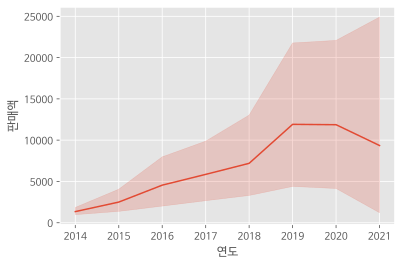

In [20]:
sns.lineplot(data=df_total,x='연도',y='판매액')
#연도가 증가할수록 판매액이 증가하다 2021년도에는 떨어지는 것을 볼 수있음

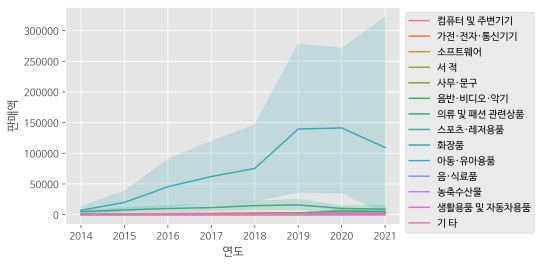

In [21]:
#상품군별로 연도별 판매액을 비교하기
sns.lineplot(data=df_total, x='연도',y='판매액',hue='상품군별')
#legend 위치 조절
plt.legend(loc='best', bbox_to_anchor=(1,1))
#화장품 판매액이 증가하다 2021년도에는 감소하는 것을 볼 수 있음

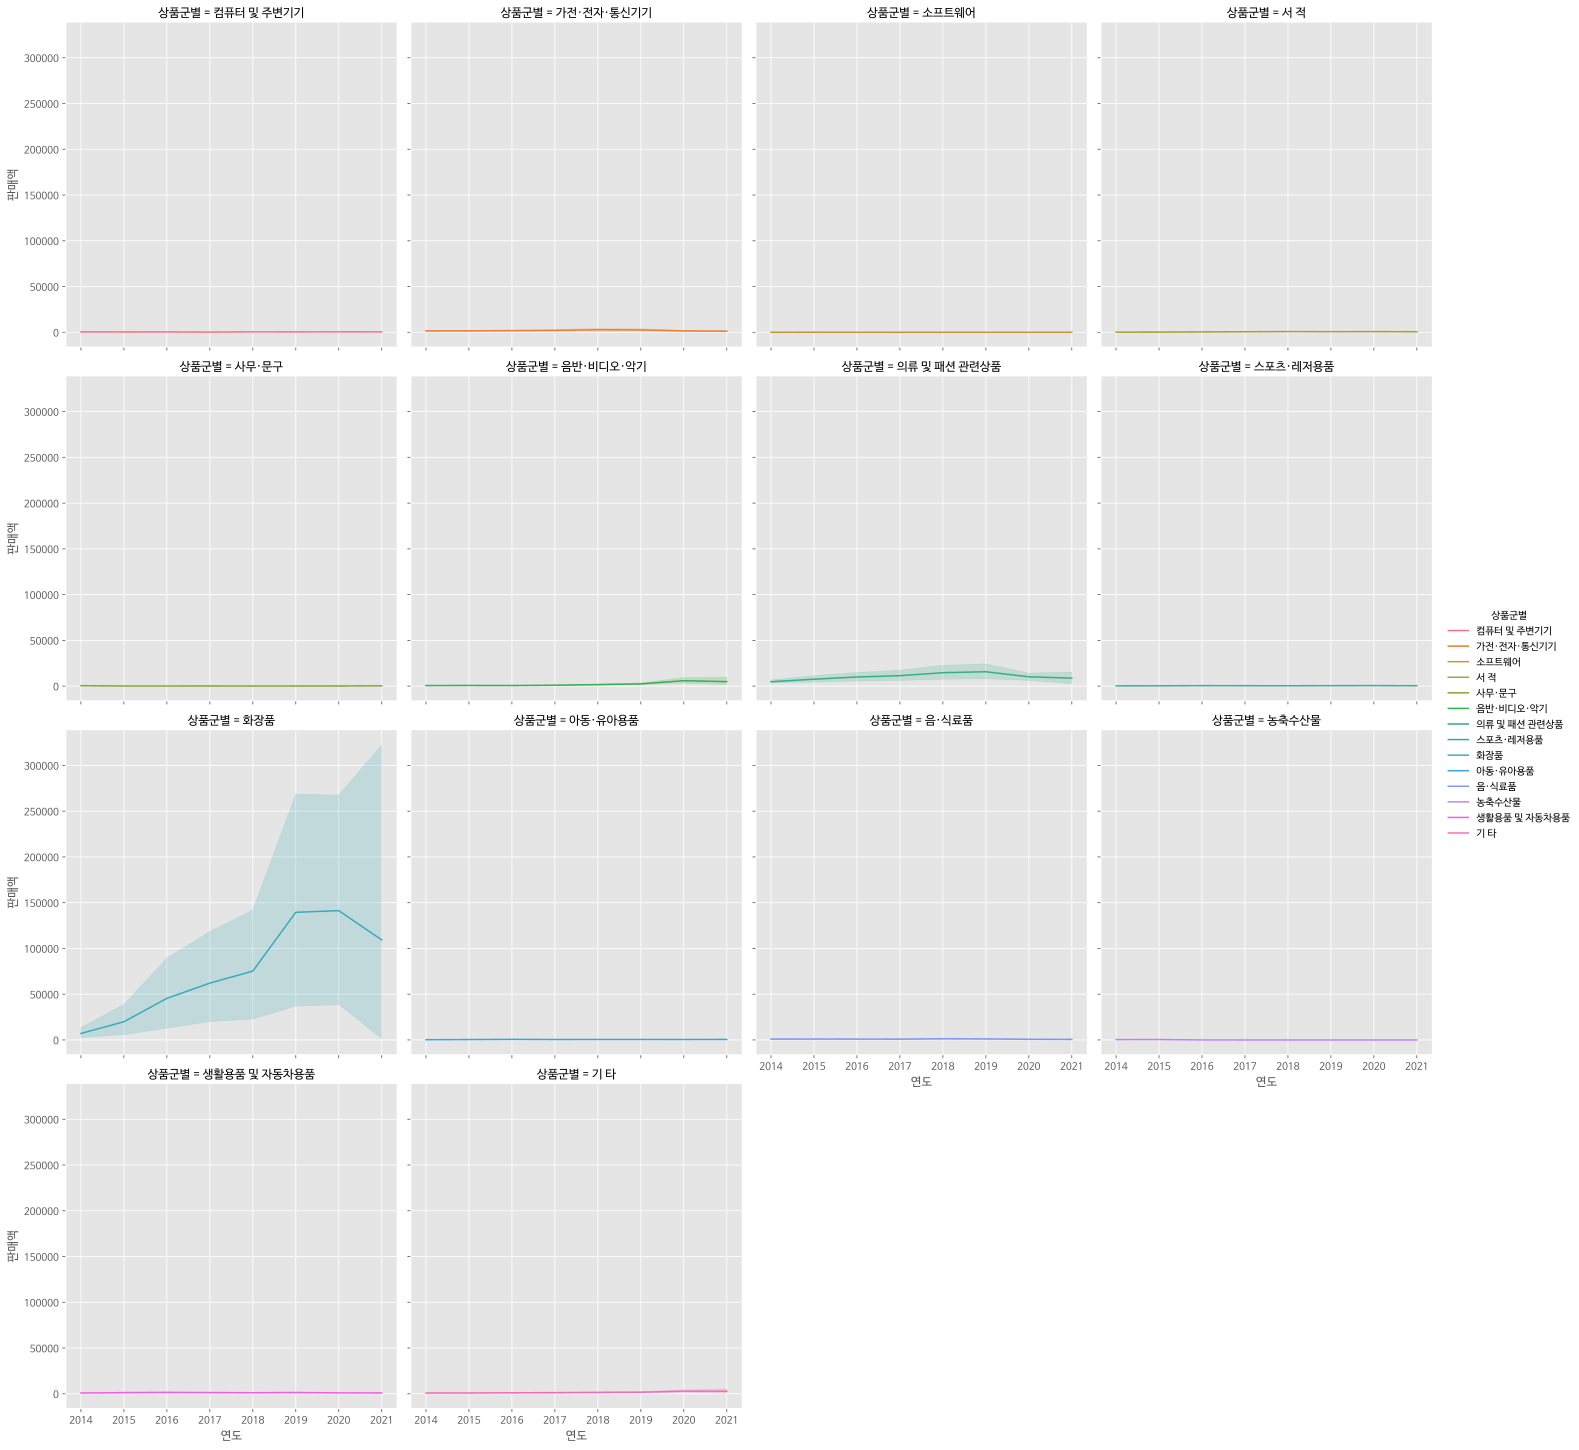

In [22]:
#위의 그래프 자세히 보기
sns.relplot(kind='line',data=df_total,x='연도',y='판매액',hue='상품군별',col='상품군별',col_wrap=4)
#화장품 판매액이 증가하다 2021년도에는 감소하는 것을 볼 수 있음

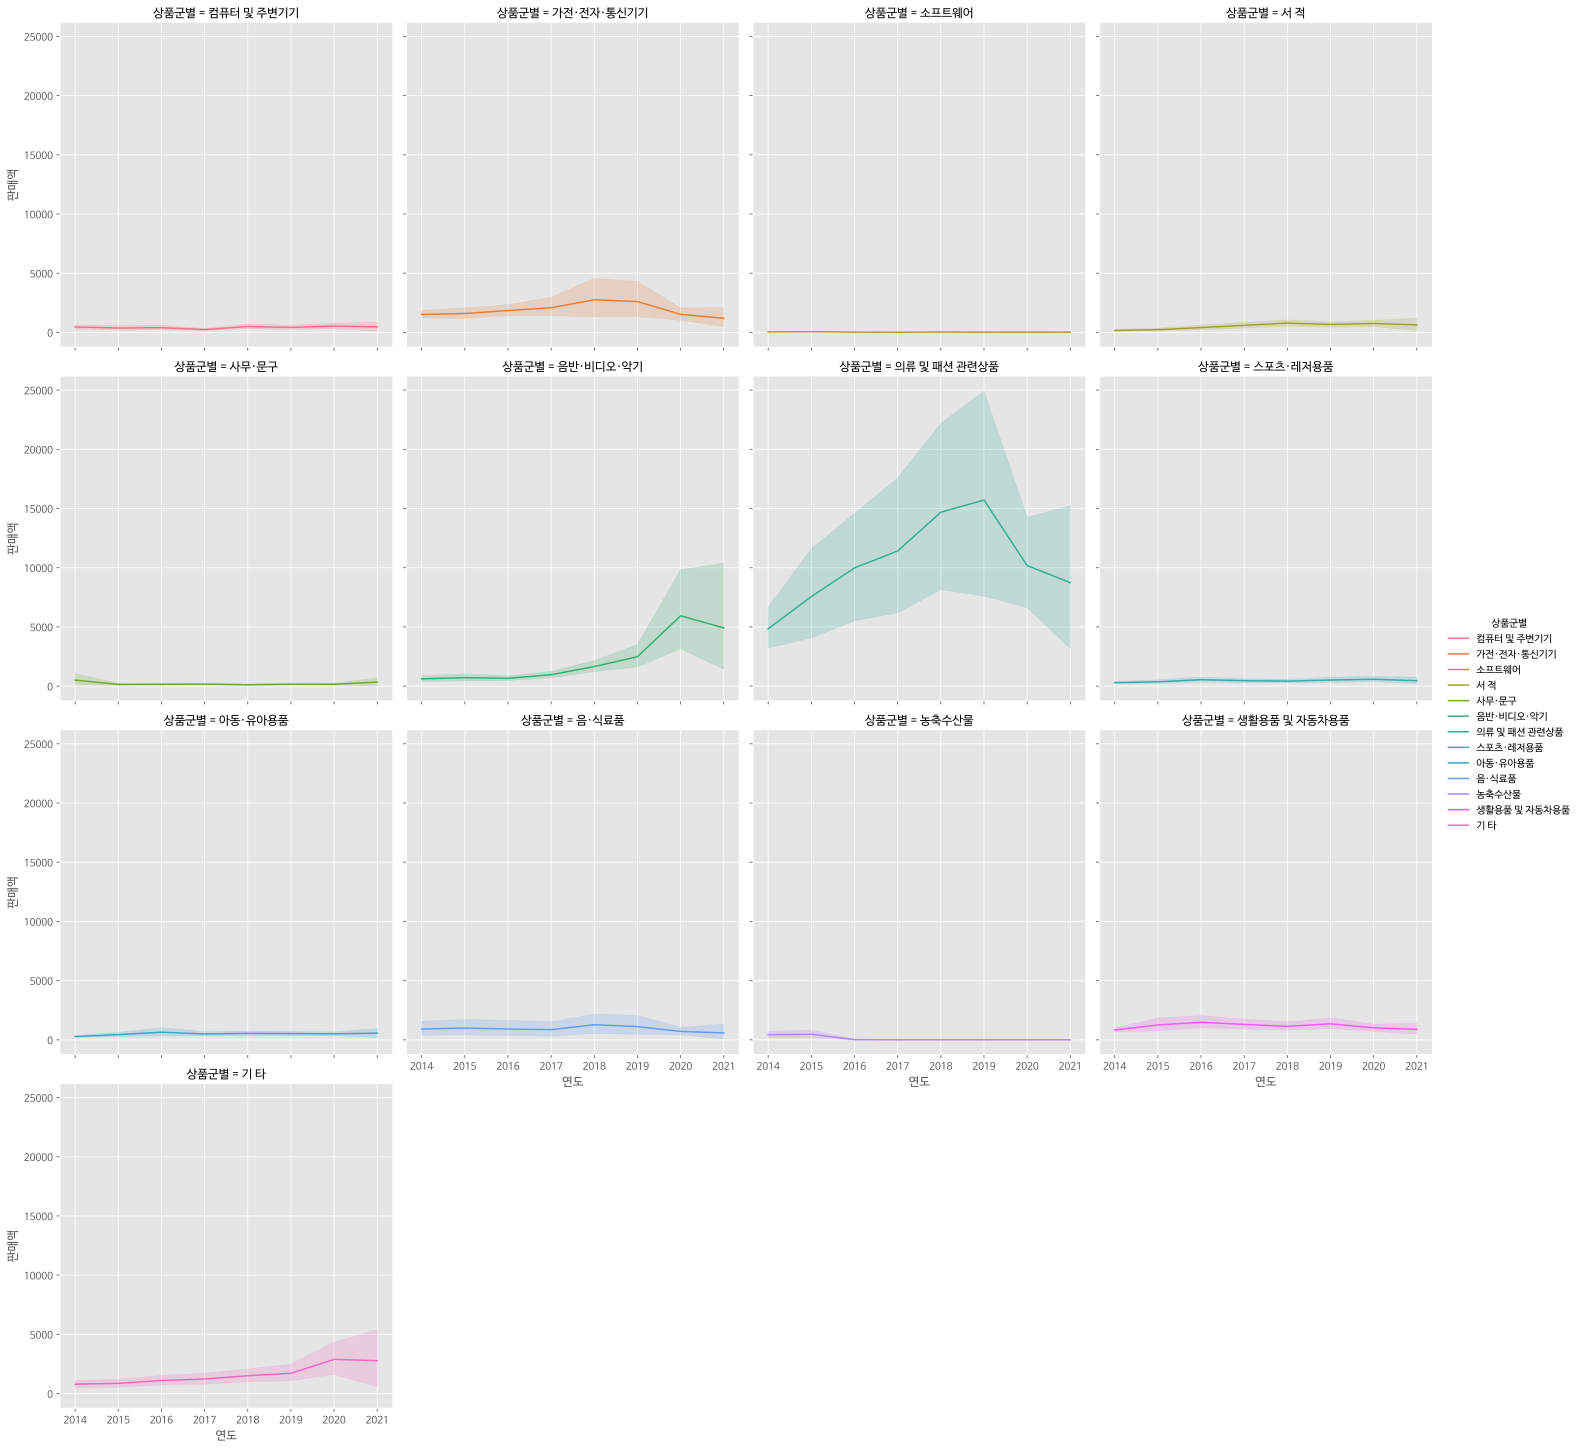

In [27]:
#화장품을 제외한 상품군별을 확인
df_sub = df_total[df_total['상품군별'] != '화장품'].copy()

sns.relplot(data=df_sub, x='연도',y='판매액',col='상품군별',hue='상품군별',col_wrap=4,kind='line')
#의류 및 패션 관련상품은 2019년까지 증가하다 감소하는 것을 볼 수 있음.

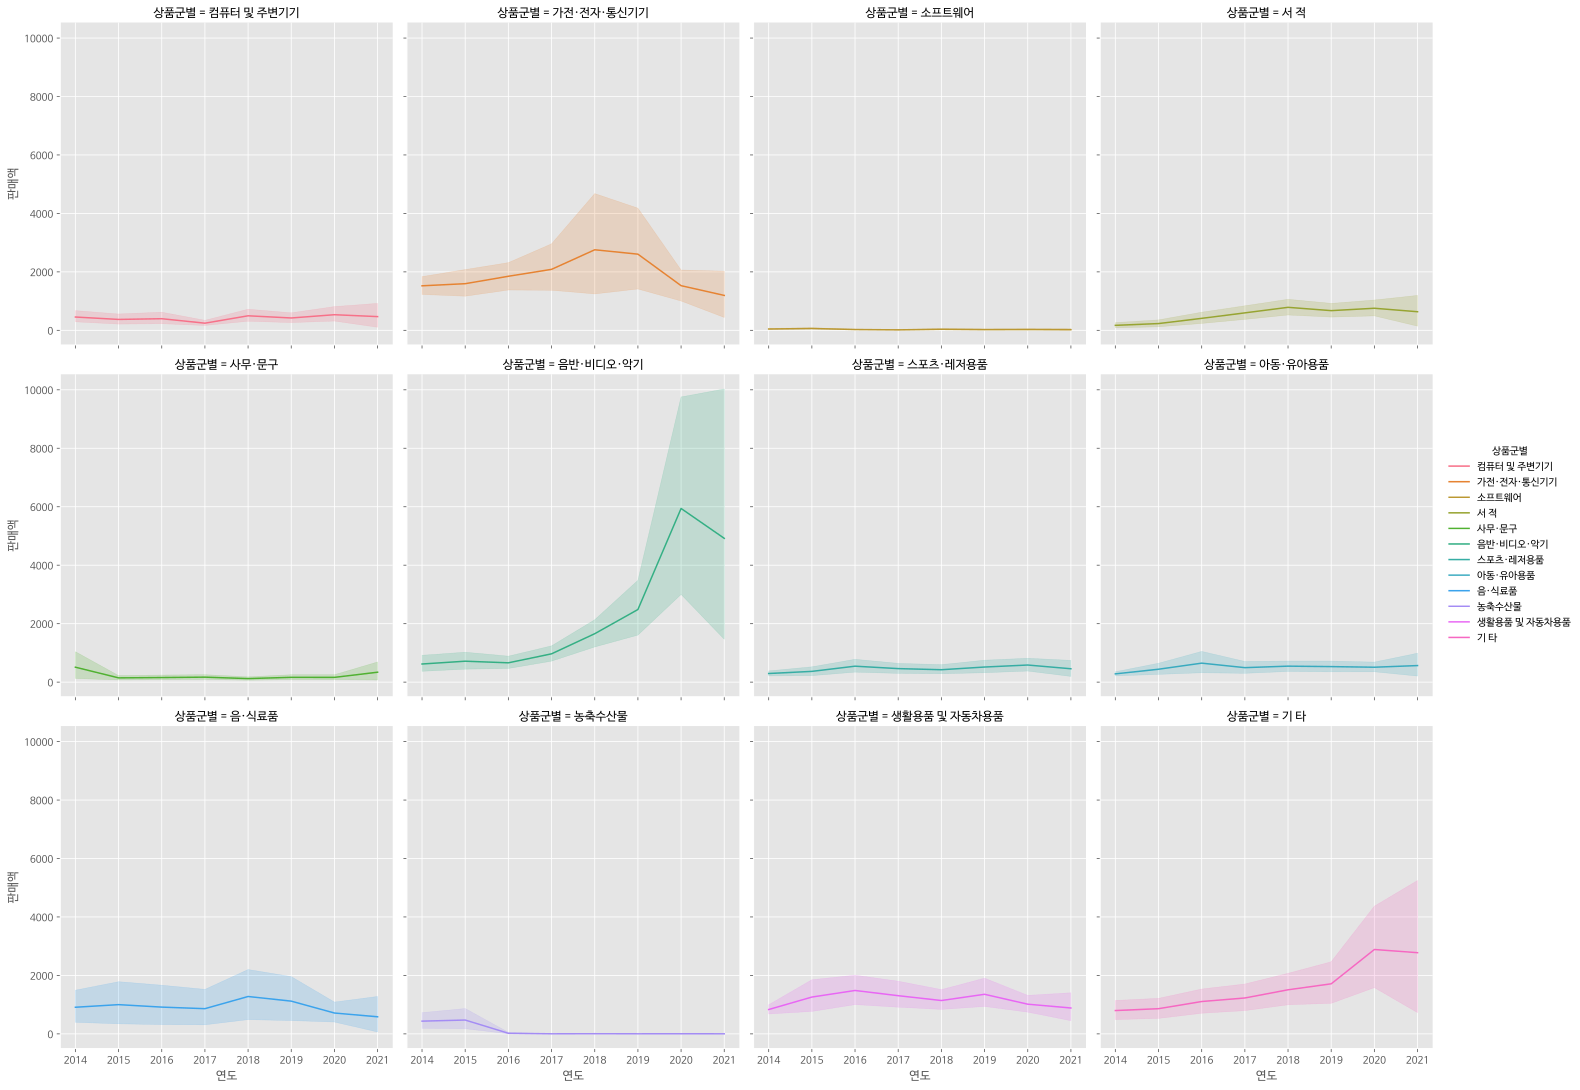

In [29]:
#화장품, 의류 및 패션 관련상품을 제외한 데이터 시각화
df_sub = df_sub[df_sub['상품군별'] != "의류 및 패션 관련상품"].copy()
sns.relplot(data=df_sub,x='연도',y='판매액',hue='상품군별',col='상품군별',col_wrap=4,kind='line')
#은반,비디오, 악기 또한 증가하다 2020년부터 감소하는 것을 볼 수 있다.

####화장품의 온라인 쇼핑 해외 직접 판매액


In [45]:
df_cosmetic = df_total[df_total['상품군별'] == '화장품'].copy()
df_cosmetic['상품군별'].unique()

array(['화장품'], dtype=object)

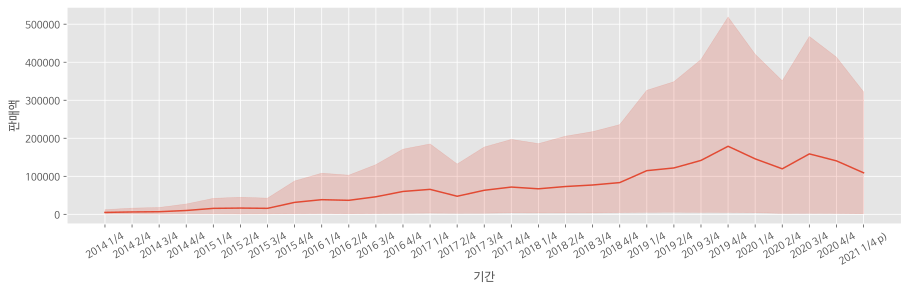

In [39]:
#기간별로 판매액을 확인하기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic,x='기간',y='판매액')
#2019년 4분기까지는 증가하는 것을 보이다. 2020년도 1분기 까지 감소함.
#이는 코로나의 영향으로 보임

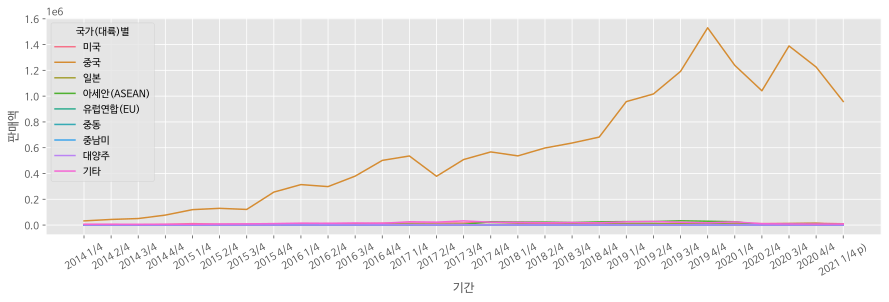

In [46]:
#화장품 판매액에 대한 기간별 금액 데이터 시각화
#국가(대륙)별로 다른 색상
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic,x='기간',y='판매액',hue='국가(대륙)별')
#중국에서 가장많이 판매되고 있음

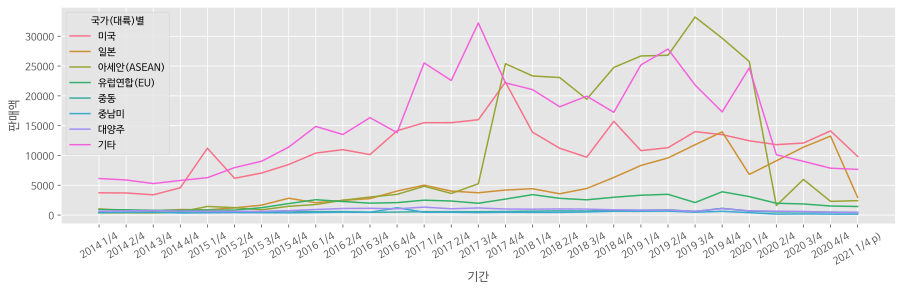

In [47]:
#중국을 제외한 다른 나라 보기
df_cosmetic_no_china = df_cosmetic[df_cosmetic['국가(대륙)별'] != '중국'].copy()
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic_no_china,x='기간',y='판매액',hue='국가(대륙)별')

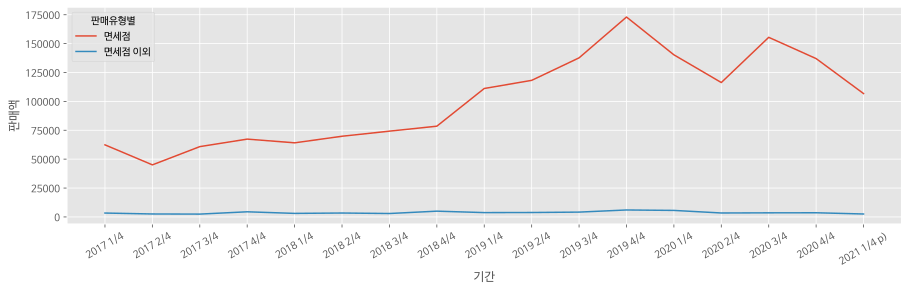

In [72]:
#판매 유형별 기간별 금액 데이터 시각화
#'계' 데이터를 제외한 화장품 데이터
df_sub = df[(df['판매유형별'] != '계') & (df['상품군별'] == '화장품')].copy()
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub, x='기간',y='판매액',hue='판매유형별',ci=None)

####의류 및 패션관련 상품 온라인 쇼핑 해외직접판매액

In [62]:
df_fashion = df_total[df_total['상품군별'] == '의류 및 패션 관련상품'].copy()
df_fashion['상품군별'].unique()

array(['의류 및 패션 관련상품'], dtype=object)

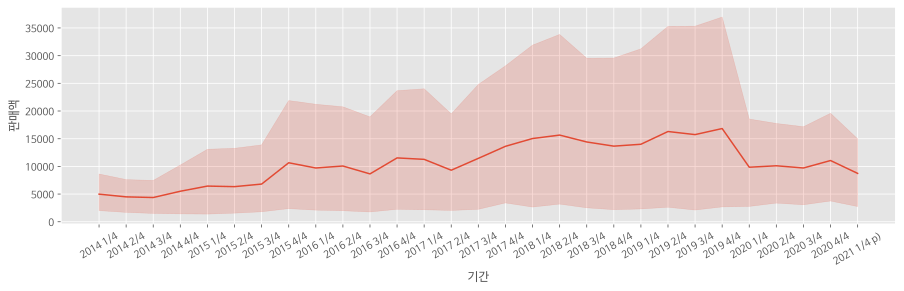

In [63]:
#의류 및 패션 관련상품 판매액에 대한 기간별 금액 데이터 시각화
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x='기간',y='판매액')

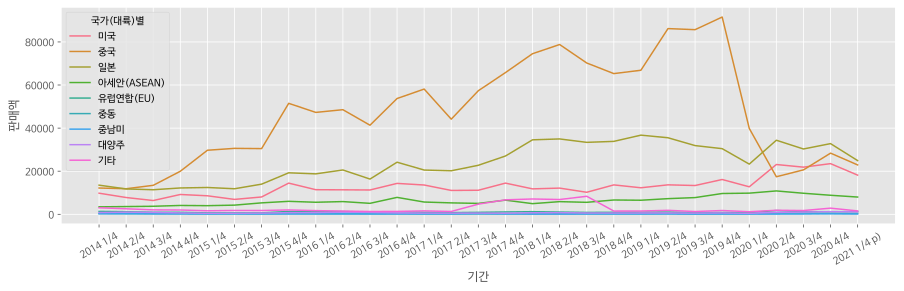

In [64]:
#의류 및 패션 관련상품 판매액에 대한 기간별 금액 데이터 시각화
#국가(대륙)별 다른 색상 표시
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x='기간',y='판매액',hue='국가(대륙)별')

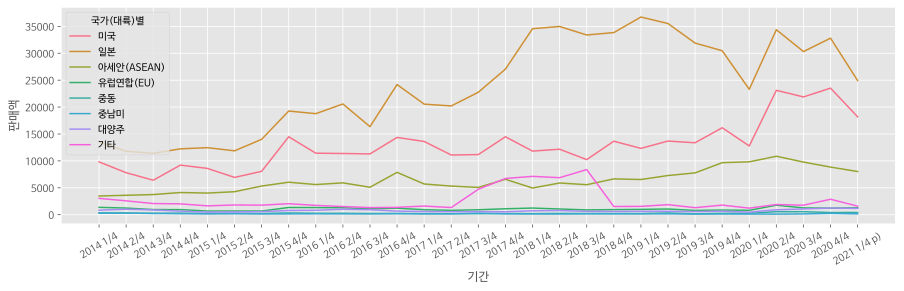

In [66]:
#중국을 제외한 의류 및 패션 관련상품 판매액에 대한 기간별 금액 데이터 시각화
df_fashion_no_china = df_fashion[df_fashion['국가(대륙)별'] != '중국'].copy()
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion_no_china, x='기간',y='판매액',hue='국가(대륙)별')

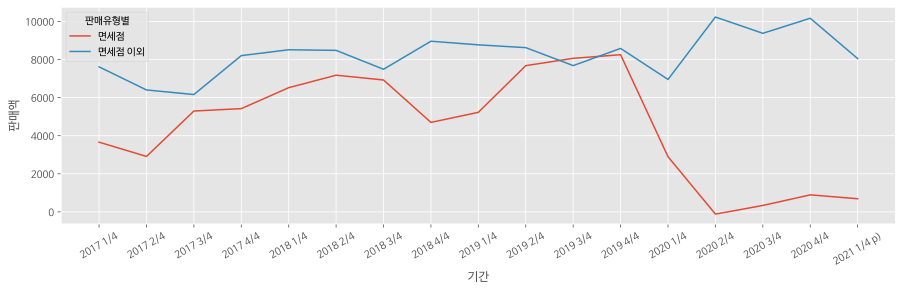

In [71]:
#의류 및 패션 관련상품 기간별 데이터 시각화
#판매유형별로 다른 색상 표현
df_fahsion_sub = df[(df['판매유형별'] != '계') & (df['상품군별'] == '의류 및 패션 관련상품')].copy()
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fahsion_sub, x='기간',y='판매액',hue='판매유형별',ci=None)

####음반·비디오·악기의 온라인 쇼핑 해외직접판매액

In [77]:
df_music = df_total[df_total['상품군별'] == '음반·비디오·악기'].copy()
music_video_instrument = '음반·비디오·악기'

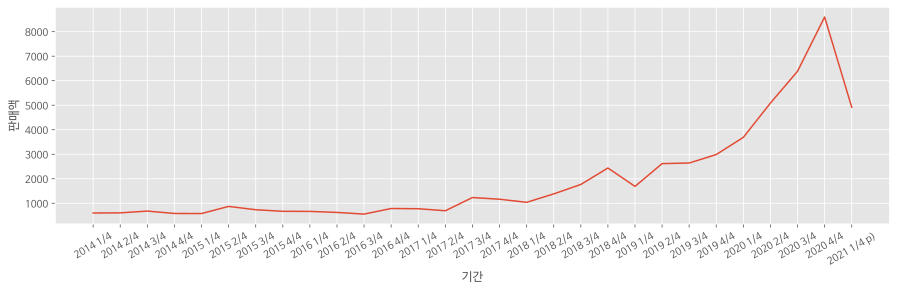

In [79]:
#음반·비디오·악기의 기간별 판매액 데이터 시각화
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_music, x='기간',y='판매액',ci=None)

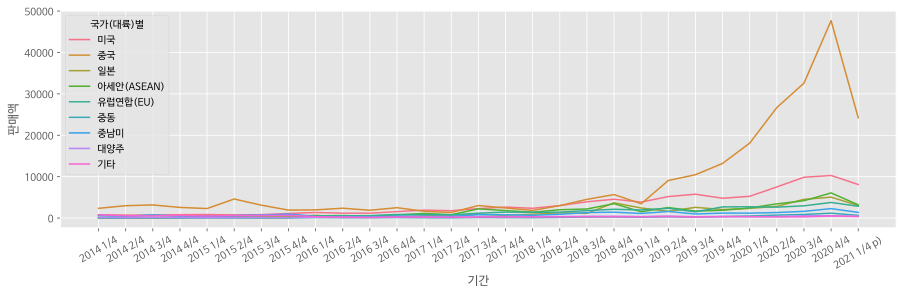

In [81]:
#음반·비디오·악기의 기간별 판매액 데이터 시각화
#국가(대륙)별로 다른색상 표시
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_music, x='기간',y='판매액',hue='국가(대륙)별')

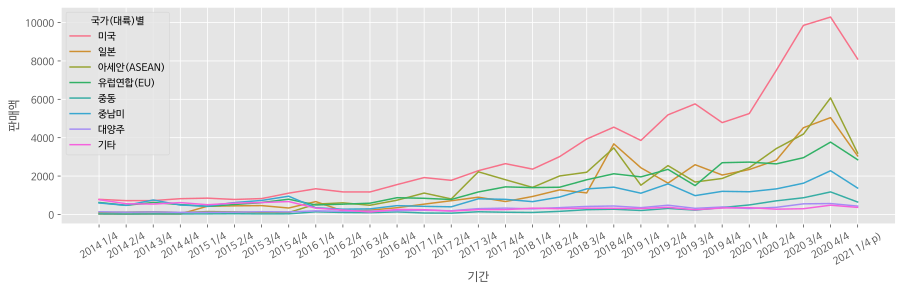

In [83]:
#중국을 제외한 음반·비디오·악기의 기간별 판매액 데이터 시각화
df_music_no_china = df_music[df_music['국가(대륙)별'] != '중국'].copy()
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_music_no_china, x='기간',y='판매액',hue='국가(대륙)별')

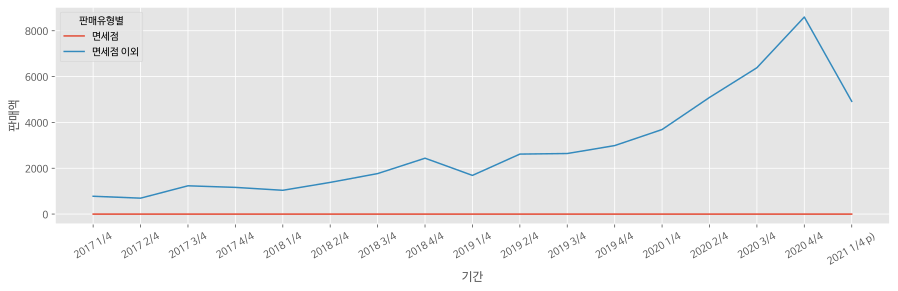

In [85]:
#음반·비디오·악기의 기간별 판매액 데이터 시각화
#판매유형별로 다른색상 표시

df_music_sub = df[(df['상품군별'] == music_video_instrument) & (df['판매유형별'] != '계')].copy()
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_music_sub, x='기간',y='판매액',hue='판매유형별',ci=None)

####데이터 집계하기

In [88]:
#피벗테이블로 국가(대륙)별, '연도'별 함께 금액을 표 형태로 구하기
#화장품 데이터
df_cosmetic = df[df['상품군별'] == '화장품'].copy()
cosmetic = df_cosmetic.pivot_table(index='국가(대륙)별',columns='연도',values='판매액',aggfunc='sum')
cosmetic

연도,2014,2015,2016,2017,2018,2019,2020,2021
국가(대륙)별,,,,,,,,
기타,23137.0,34700.0,58579.0,205058.0,152866.0,184372.0,103420.0,15334.0
대양주,2776.0,2634.0,4248.0,9238.0,7852.0,6772.0,4922.0,914.0
미국,15447.0,32951.0,45684.0,138656.0,101166.0,99240.0,101010.0,19698.0
아세안(ASEAN),1705.0,5065.0,10773.0,78272.0,181270.0,232842.0,71330.0,4844.0
유럽연합(EU),3428.0,4858.0,8960.0,19078.0,23610.0,25682.0,16972.0,2888.0
일본,3400.0,6600.0,11345.0,33996.0,37560.0,87378.0,81170.0,5942.0
중국,203499.0,625774.0,1493237.0,3979300.0,4906344.0,9393282.0,9790482.0,1916814.0
중남미,1792.0,1592.0,2616.0,3700.0,4168.0,4846.0,1908.0,336.0
중동,1794.0,2312.0,2152.0,4666.0,5732.0,6798.0,4434.0,840.0


In [89]:
#피벗테이블로 국가(대륙)별, '연도'별 함께 금액을 표 형태로 구하기
#의류 및 패션 관련상품 데이터
df_fashion = df[df['상품군별'] == '의류 및 패션 관련상품'].copy()
fashion = df_fashion.pivot_table(index='국가(대륙)별',columns='연도',values='판매액',aggfunc='sum')
fashion

연도,2014,2015,2016,2017,2018,2019,2020,2021
국가(대륙)별,,,,,,,,
기타,9683.0,7248.0,5918.0,28774.0,47802.0,12950.0,15468.0,3170.0
대양주,3392.0,2349.0,3401.0,4532.0,5450.0,4978.0,7372.0,2318.0
미국,33223.0,38066.0,48451.0,100706.0,95750.0,111072.0,162594.0,36362.0
아세안(ASEAN),14936.0,19639.0,24478.0,45342.0,46136.0,62494.0,78626.0,16038.0
유럽연합(EU),4485.0,3374.0,4899.0,7472.0,8228.0,7388.0,10090.0,2564.0
일본,48960.0,57594.0,79905.0,181168.0,273600.0,269274.0,241634.0,49852.0
중국,57531.0,142339.0,190932.0,450814.0,577696.0,660534.0,212636.0,45838.0
중남미,975.0,616.0,649.0,1524.0,1152.0,1088.0,1222.0,294.0
중동,1172.0,1018.0,968.0,1544.0,1758.0,1902.0,3534.0,806.0


In [90]:
#피벗테이블로 국가(대륙)별, '연도'별 함께 금액을 표 형태로 구하기
#음반·비디오·악기 데이터
df_music = df[df['상품군별'] == '음반·비디오·악기'].copy()
music = df_music.pivot_table(index='국가(대륙)별',columns='연도',values='판매액',aggfunc='sum')
music

연도,2014,2015,2016,2017,2018,2019,2020,2021
국가(대륙)별,,,,,,,,
기타,2484.0,2388.0,949.0,1854.0,2550.0,2518.0,2820.0,736.0
대양주,494.0,506.0,724.0,2082.0,3008.0,3080.0,3600.0,870.0
미국,3050.0,3566.0,5241.0,17256.0,27716.0,39192.0,65834.0,16204.0
아세안(ASEAN),439.0,479.0,2365.0,11906.0,18166.0,15268.0,32270.0,6398.0
유럽연합(EU),2237.0,2351.0,2489.0,8458.0,13494.0,17014.0,24184.0,5704.0
일본,99.0,1674.0,1427.0,5648.0,14036.0,17424.0,29476.0,6100.0
중국,11079.0,11935.0,8743.0,16874.0,30092.0,72386.0,250156.0,48480.0
중남미,2316.0,2734.0,1373.0,4844.0,8654.0,9770.0,12842.0,2748.0
중동,108.0,131.0,463.0,796.0,1568.0,2214.0,6500.0,1294.0


####연산 결과를 시각적으로 보기

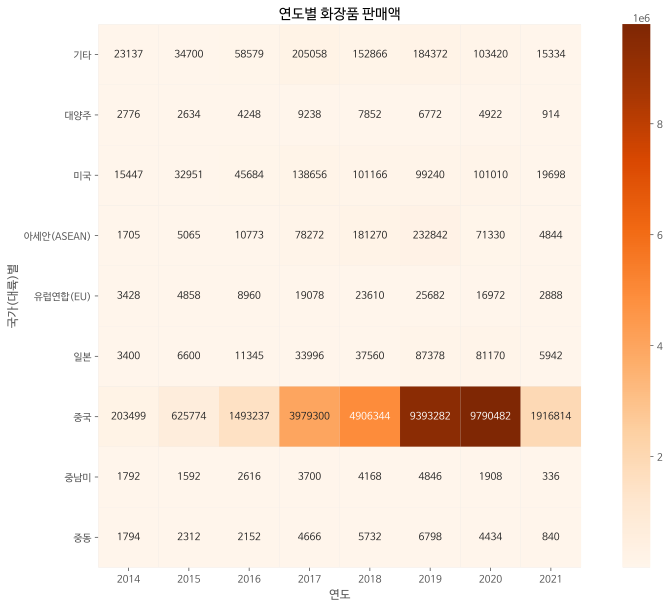

In [94]:
plt.figure(figsize=(15,10))
plt.title('연도별 화장품 판매액')
sns.heatmap(data=cosmetic,cmap='Oranges',annot=True,fmt='.0f',square=True)

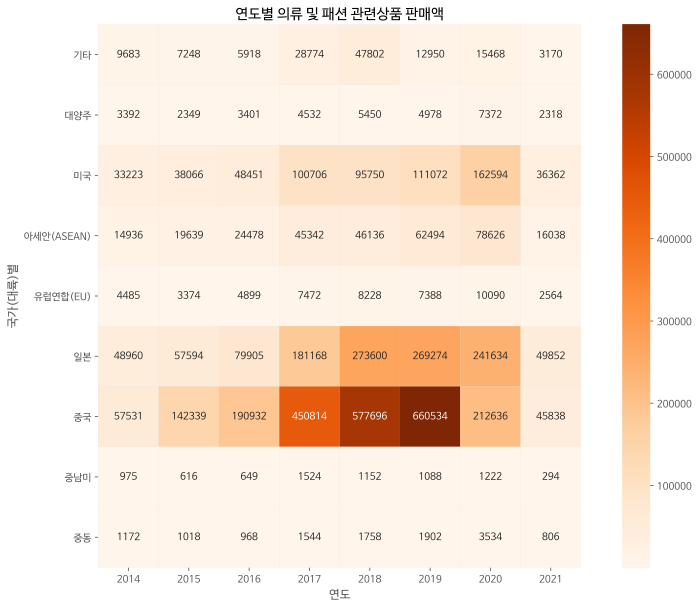

In [95]:
plt.figure(figsize=(15,10))
plt.title('연도별 의류 및 패션 관련상품 판매액')
sns.heatmap(data=fashion,cmap='Oranges',annot=True,fmt='.0f',square=True)

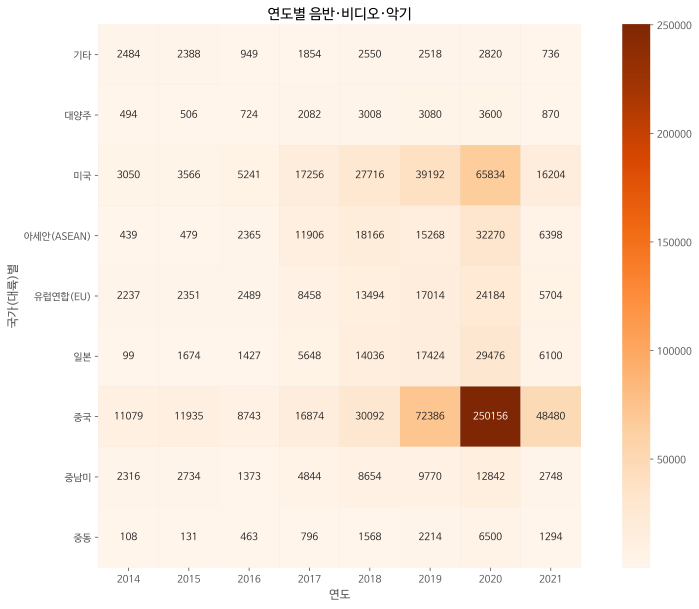

In [96]:
plt.figure(figsize=(15,10))
plt.title('연도별 음반·비디오·악기')
sns.heatmap(data=music,cmap='Oranges',annot=True,fmt='.0f',square=True)

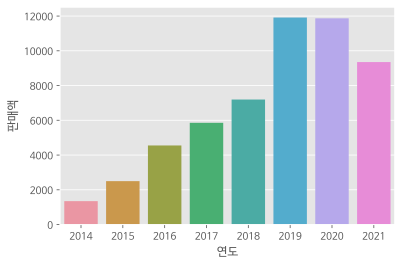

In [99]:
#온라인 쇼핑의 연도별 판매액
sns.barplot(data=df_total, x='연도',y='판매액',ci=None)